# 전국 도시 공원 표준 데이터

https://www.data.go.kr/dataset/15012890/standard.do
* 전국 도시 공원 표준데이터에는 데이터를 전처리 해보기에 좋은 데이터가 많습니다.
* 시간, 결측치, 이상치, 수치형, 범주형 데이터를 고르게 볼 수 있으며 다양한 텍스트 데이터 처리를 해볼 수 있습니다.
* 또 정규표현식을 활용해서 텍스트 데이터 전처리와 데이터 마스킹 기법에 대해 다룹니다.
* 그리고 이렇게 전처리한 내용을 바탕으로 전국 도시공원에 대한 분포를 시각화해 봅니다.
* 어떤 공원이 어느 지역에 어떻게 분포되어 있는지를 위경도로 표현해 봅니다.

## 이번 챕터에서 설치가 필요한 도구

* 별도의 설치가 필요합니다.(folium 을 설치했던 것 처럼 따로 설치해야지만 사용할 수 있습니다.)

* 윈도우
    * <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


### Pandas Profiling
* [pandas-profiling/pandas-profiling: Create HTML profiling reports from pandas DataFrame objects](https://github.com/pandas-profiling/pandas-profiling)

* 2020년 4월 기준 판다스 1.0 이상 버전을 지원하지 않습니다.
* 아나콘다로 주피터를 설치했다면 : `conda install -c conda-forge pandas-profiling`
* pip로 주피터를 설치했다면 : `pip install pandas-profiling`

### 워드클라우드
[amueller/word_cloud: A little word cloud generator in Python](https://github.com/amueller/word_cloud)

* 다음 명령어로 설치가 가능합니다. conda prompt 혹은 터미널을 열어 설치해 주세요.

* conda : `conda install -c conda-forge wordcloud`
* pip : `pip install wordcloud`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# seaborn의 set 기능으로 폰트, 마이너스 폰트 및 스타일 설정
# sns.set을 새로 할 경우 초기화 되어 이전 설정이 적용 안됨.
# 제대로 설정 안된다면 sns.set가 한 번 이상 설정된게 아닌지 확인할 것.

sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, 
        style="darkgrid")

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<AxesSubplot:title={'center':'한글폰트'}>

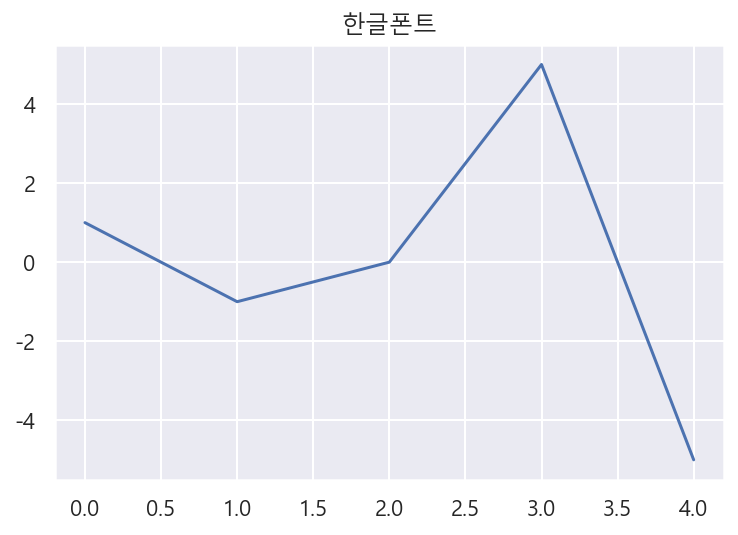

In [4]:
pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")

### 데이터 로드

In [5]:
# 데이터 로드해서 df 변수에 담기
%ls C:\Users\pmj35\Documents\project

 C 드라이브의 볼륨: Acer
 볼륨 일련 번호: 1CC4-4493

 C:\Users\pmj35\Documents\project 디렉터리

2021-02-13  오후 03:50    <DIR>          .
2021-02-13  오후 03:50    <DIR>          ..
2021-02-13  오후 01:34    <DIR>          .ipynb_checkpoints
2021-01-31  오후 09:21         2,143,772 apartment.ipynb
2021-02-12  오후 06:26         6,195,688 coffee.ipynb
2021-02-10  오후 06:55         9,687,774 franchise.ipynb
2021-02-10  오후 06:55         1,110,377 heatmap.html
2021-02-10  오후 07:00             3,441 index.html
2021-02-13  오후 03:35    <DIR>          open-data-analysis-basic-master
2021-02-10  오후 06:42         1,085,776 paris-TousLesJours-index.html
2021-02-13  오후 03:50           534,544 park.ipynb
2021-02-13  오후 03:06         1,827,015 park_pandas_profile.html
2021-02-12  오후 05:02            57,732 seoul_municipalities_geo_simple.json
2021-02-10  오후 05:48        77,085,147 seoul_open_store.csv
2021-02-10  오후 07:01         5,853,302 store.ipynb
2021-02-01  오후 10:33       264,920,940 상가업소정보_201912_01.csv
2020-12-26  오후

In [6]:
df=pd.read_csv("전국도시공원표준데이터.csv", encoding="cp949")
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
3,26440-00004,용두공원,어린이공원,NaN,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,NaN,"조합놀이기구, 그네",NaN,NaN,"정자, 농구장, 평의자6",1998-07-25,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
4,26440-00005,새동내공원,어린이공원,NaN,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,8,"조합놀이기구, 그네, 흔들놀이기구2",NaN,NaN,"정자, 평의자14, 트렐리스2, 안내판, 볼라드",1995-04-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


### Pandas Profilling

In [9]:
import pandas_profiling

* 미리 생성해 놓은 리포트 보기 : https://corazzon.github.io/open-data-analysis-basic/05-park_pandas_profile.html

In [10]:
# html 파일보면 interactions와 correlations가 제대로 안 나옴
# 이건 pandas_profiling 버전 문제로, 2.8.0 버전을 설치해보면 해결될 것.
from pandas_profiling import ProfileReport

%time profile=ProfileReport(df, title="도시공원 표준 데이터")
profile.to_file(output_file="park_pandas_profile.html")

Wall time: 57.1 ms


C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50948 missing from current fo

C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47732 missing from curre

C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from c

C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text

C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 55148 missing from c

C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from c

C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text

C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51116 missing from current fon

C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 47536 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44540 missing from current font.
  font.set_text

C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text

C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text

### 기본정보 보기

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18137 non-null  object 
 1   공원명           18137 non-null  object 
 2   공원구분          18137 non-null  object 
 3   소재지도로명주소      8039 non-null   object 
 4   소재지지번주소       17158 non-null  object 
 5   위도            18137 non-null  float64
 6   경도            18137 non-null  float64
 7   공원면적          18137 non-null  float64
 8   공원보유시설(운동시설)  4845 non-null   object 
 9   공원보유시설(유희시설)  6964 non-null   object 
 10  공원보유시설(편익시설)  5084 non-null   object 
 11  공원보유시설(교양시설)  1160 non-null   object 
 12  공원보유시설(기타시설)  3116 non-null   object 
 13  지정고시일         15225 non-null  object 
 14  관리기관명         17383 non-null  object 
 15  전화번호          16957 non-null  object 
 16  데이터기준일자       18137 non-null  object 
 17  제공기관코드        18137 non-null  object 
 18  제공기관명         18137 non-nu

In [12]:
#결측치 수 구하기
df.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10098
소재지지번주소           979
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13292
공원보유시설(유희시설)    11173
공원보유시설(편익시설)    13053
공원보유시설(교양시설)    16977
공원보유시설(기타시설)    15021
지정고시일            2912
관리기관명             754
전화번호             1180
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     18137
dtype: int64

In [13]:
# 결측 평균을 통해 비율을 구하고 100을 곱해줌 -> % 값으로 알 수 있음
# round()소수점 아래 숫자 설정 가능

round(df.isnull().mean()*100, 2)

관리번호              0.00
공원명               0.00
공원구분              0.00
소재지도로명주소         55.68
소재지지번주소           5.40
위도                0.00
경도                0.00
공원면적              0.00
공원보유시설(운동시설)     73.29
공원보유시설(유희시설)     61.60
공원보유시설(편익시설)     71.97
공원보유시설(교양시설)     93.60
공원보유시설(기타시설)     82.82
지정고시일            16.06
관리기관명             4.16
전화번호              6.51
데이터기준일자           0.00
제공기관코드            0.00
제공기관명             0.00
Unnamed: 19     100.00
dtype: float64

### 결측치 시각화

In [14]:
# seaborn의 set 기능으로 한글폰트 재설정

sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, 
        style="darkgrid")

In [15]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<AxesSubplot:>

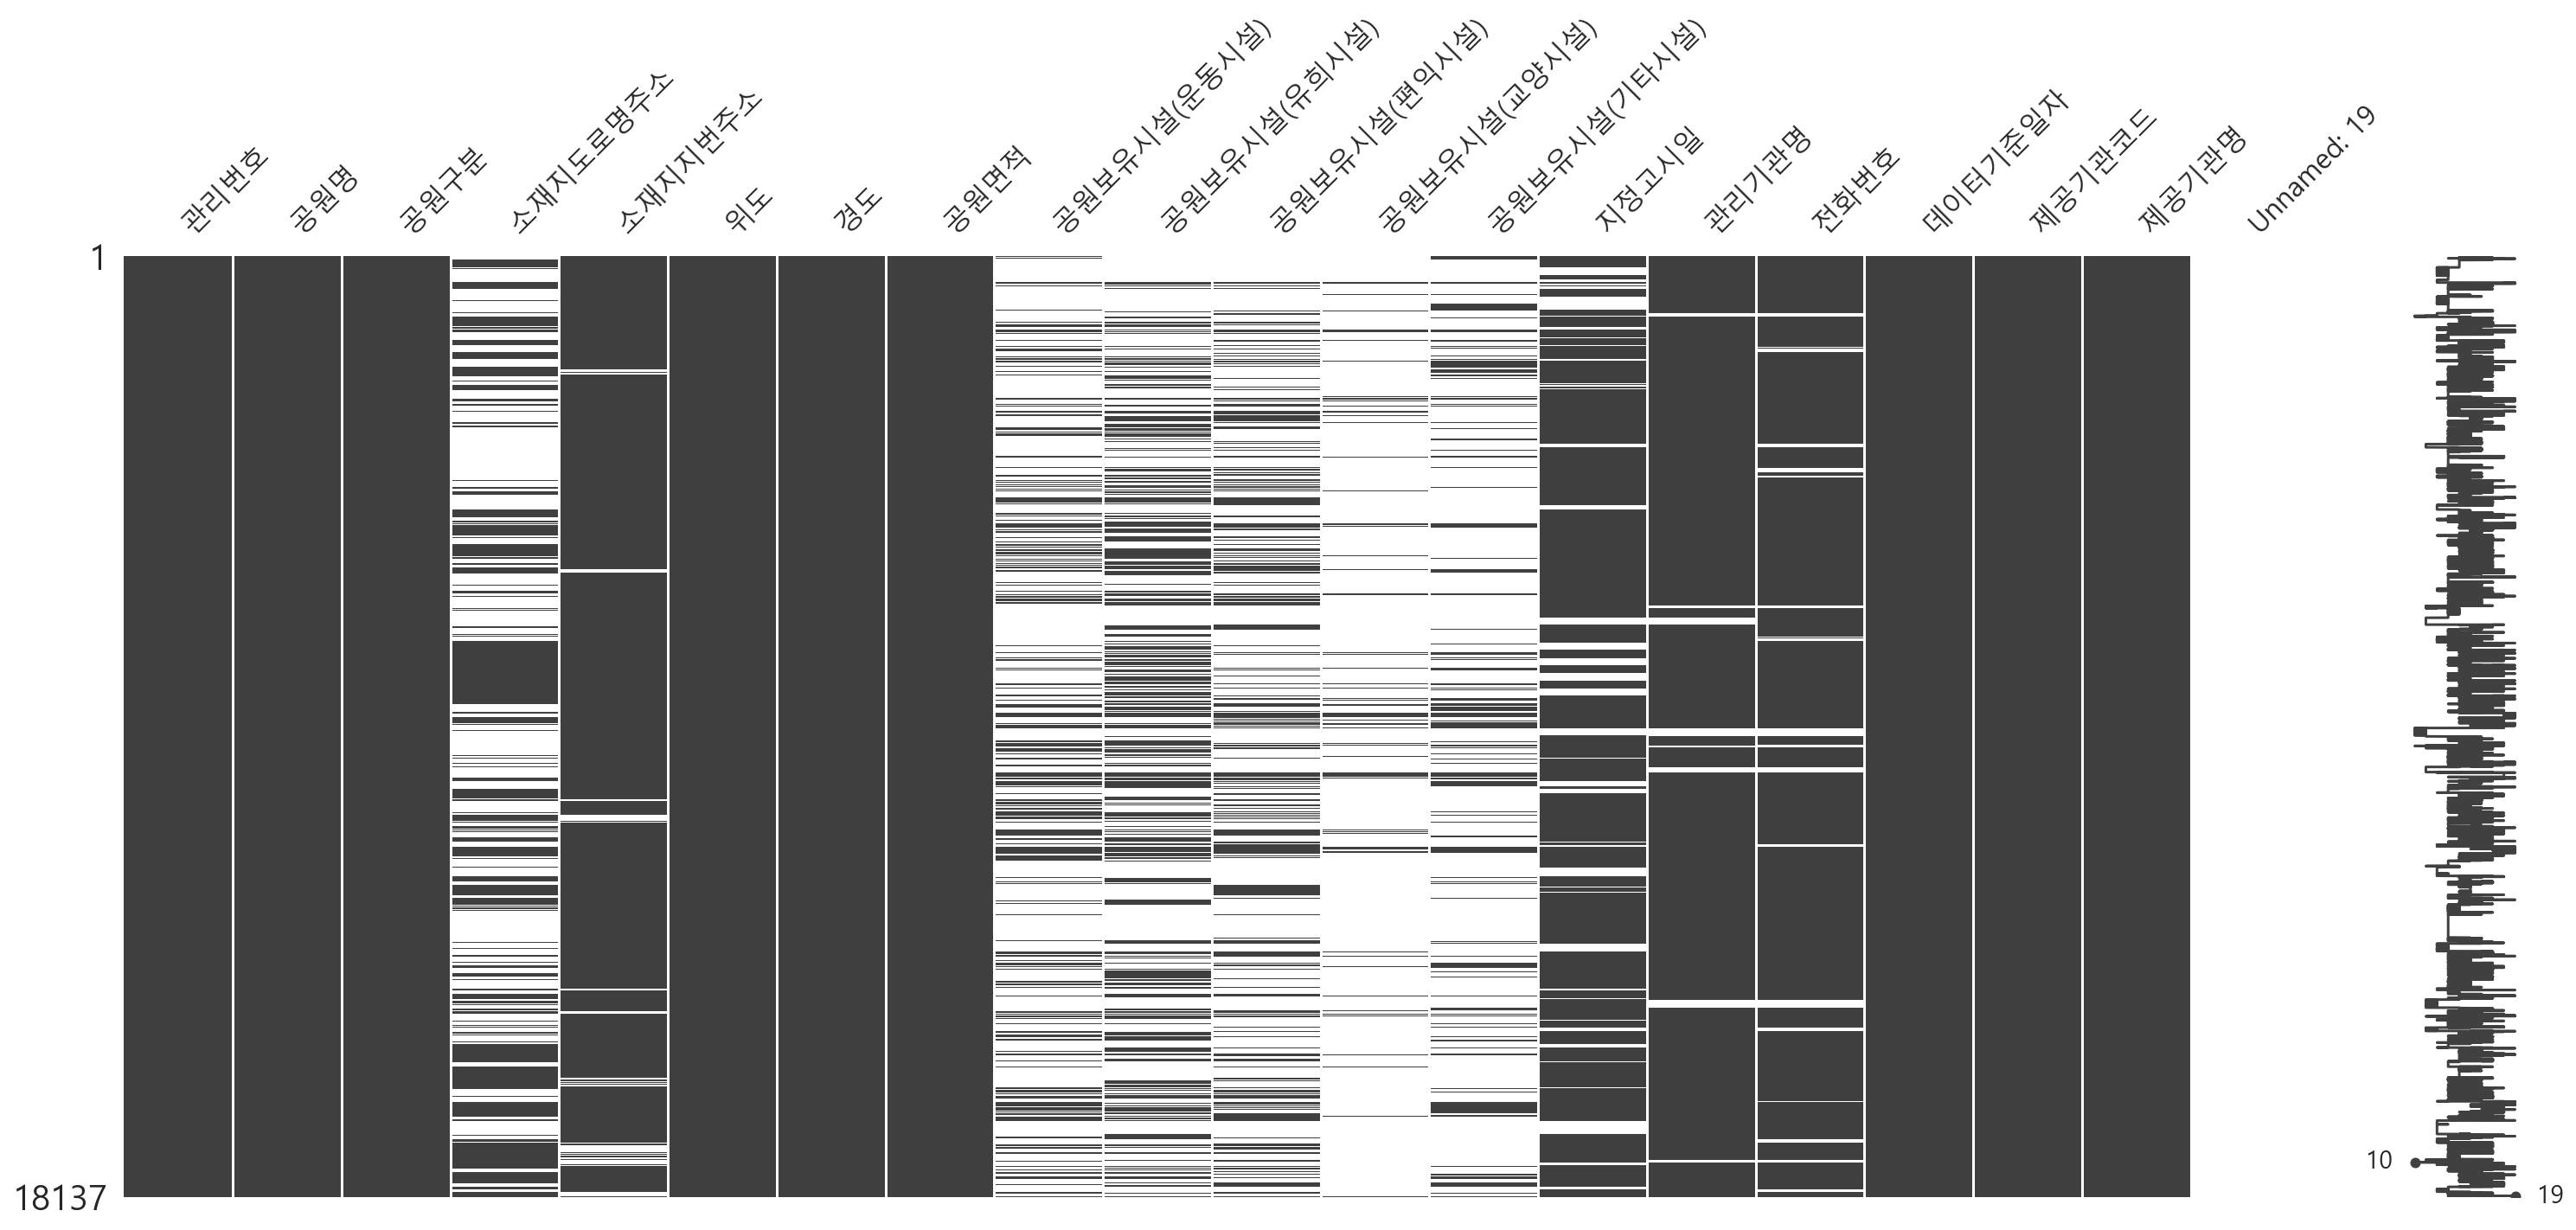

In [16]:
import missingno

missingno.matrix(df)

<AxesSubplot:>

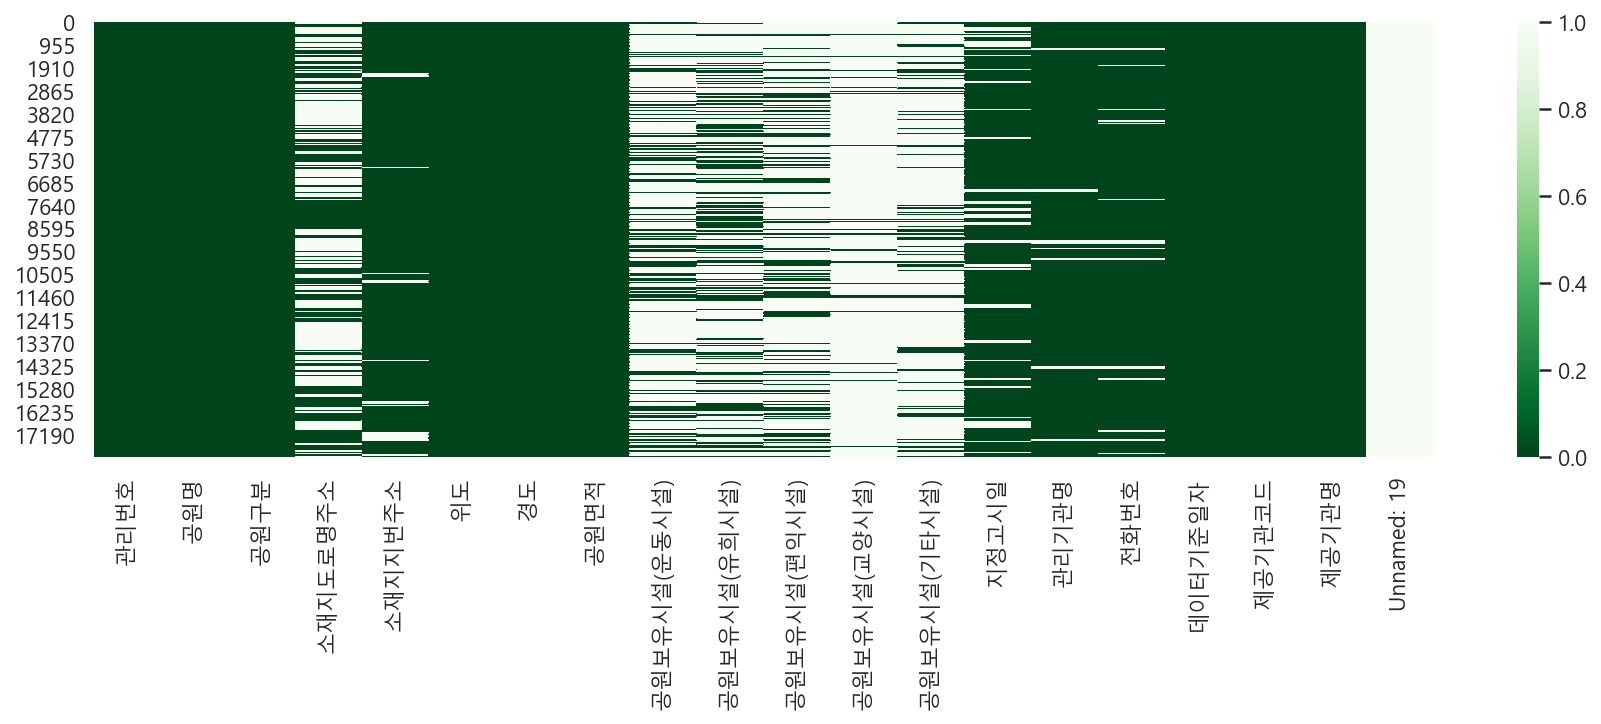

In [17]:
# seaborn으로 위와 같은 결측치 그래프 그려보기
# 1.0 = True, 0.0= False
# 흰색에 가까울수록 결측치가 많다는 것을 의미
null=df.isnull()
plt.figure(figsize=(15, 4))
sns.heatmap(null, cmap="Greens_r")

## 데이터 전처리
* 불필요한 컬럼제거
    * 시도 결측치 처리
    * 다른 데이터로 대체
* 도로명 혹은 지번 둘 중 하나만 있다면 있는 데이터로 대체
* 아웃라이어 데이터 제거 혹은 대체
    * 위/경도가 국내 범위를 벗어나는 데이터 제외하도록 처리

### 불필요한 컬럼 제거

In [18]:
# 전체 컬럼명 출력
df.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [19]:
# drop으로 "Unnamed: 19" 제거
print(df.shape)
df=df.drop(["Unnamed: 19"], axis=1)
print(df.shape)

(18137, 20)
(18137, 19)


### 결측치 대체

#### 도로명 주소와 지번 주소
* 둘 중 하나만 있을 때, 나머지 데이터로 결측치 대체하기

In [20]:
# 도로명 주소의 결측치 수
df["소재지도로명주소"].isnull().sum()

10098

In [21]:
# 지번 주소의 결측치 수
df["소재지지번주소"].isnull().sum()

979

In [22]:
# '소재지도로명주소'와 '소재지지번주소'가 모두 결측치가 아닌 데이터 찾기
df[df['소재지도로명주소'].notnull() & df['소재지지번주소'].notnull()].shape

(7060, 19)

In [23]:
# '소재지도로명주소'의 결측치에 fillna를 이용해 '소재지지번주소' 값을 채우기
df['소재지도로명주소']=df['소재지도로명주소'].fillna(df["소재지지번주소"])

In [24]:
# '소재지도로명주소' 결측치 세기
df['소재지도로명주소'].isnull().sum()

0

In [25]:
# '소재지도로명주소'와 '소재지지번주소'가 모두 결측치인 데이터 찾기
df[df['소재지도로명주소'].isnull() & df['소재지지번주소'].isnull()].shape

(0, 19)

#### 주소를 통한 시도, 구군 변수 생성

In [29]:
# 소재지도로명주소로 시도, 구군 변수 생성하기
# str.split()[0]으로 데이터를 가져오면 제일 첫 번째 레코드를 가져옴 
# str.split(' ', expand=True)[0] 으로 공백문자를 기준으로 분리한 후, 리스트 첫 번째 값 가져오기
df["시도"]=df["소재지도로명주소"].str.split(' ', expand=True)[0]
df["구군"]=df["소재지도로명주소"].str.split(expand=True)[1]
df[["소재지도로명주소", "시도", "구군"]].head()

,소재지도로명주소,시도,구군
0,부산광역시 강서구 구랑동 1199-7,부산광역시,강서구
1,부산광역시 강서구 구랑동 1219,부산광역시,강서구
2,부산광역시 강서구 대저1동 1330-7,부산광역시,강서구
3,부산광역시 강서구 대저2동 1870-67,부산광역시,강서구
4,부산광역시 강서구 대저2동 2407-1,부산광역시,강서구


In [31]:
# 시도 데이터 빈도수 세기
df["시도"].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         647
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
강원            1
Name: 시도, dtype: int64

In [35]:
# 강원은 강원도로 변경하기
df["시도"]=df["시도"].replace("강원", "강원도")
df["시도"].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         648
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
Name: 시도, dtype: int64

### 이상치 제거
* 경도, 위도의 이상치를 제거

<AxesSubplot:xlabel='경도', ylabel='위도'>

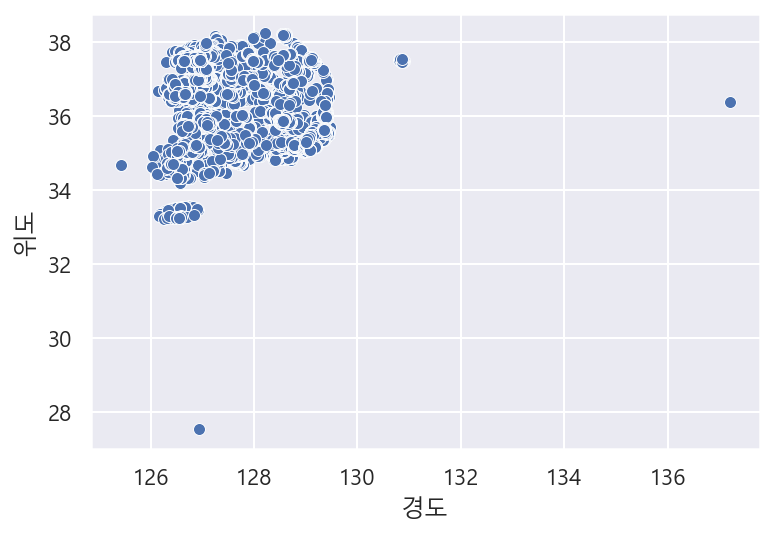

In [37]:
# 위셩도 시각화
sns.scatterplot(data=df, x="경도", y="위도")

In [51]:
# 위 지도에서 위경도의 아웃라이어를 제외하고 출력
# 정확하게 출력하기 위해 대한민국 위경도 데이터 범위를 넣어주기
# 이상치를 제거한 데이터는 df_park라는 변수에 담기
df_park=df[(df["경도"] < 132) & (df["위도"]>32)].copy()

<AxesSubplot:xlabel='경도', ylabel='위도'>

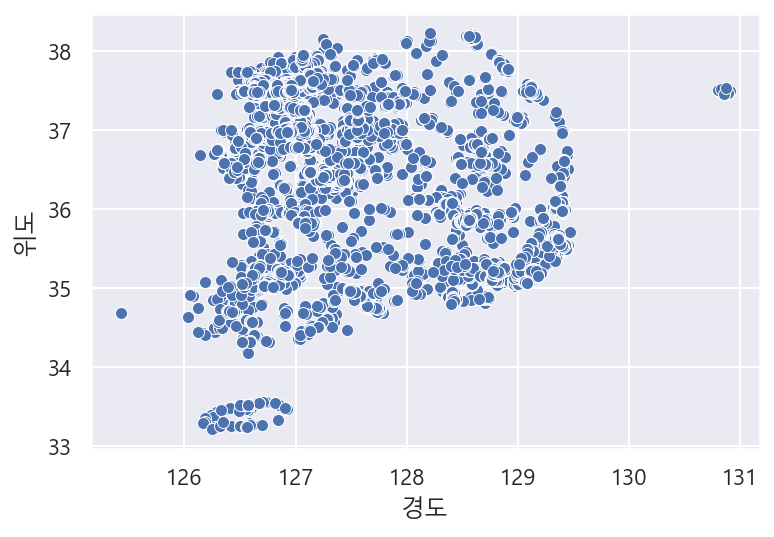

In [52]:
# 위경도 아웃라이어 제거 확인하기
sns.scatterplot(data=df_park, x="경도", y="위도")

In [54]:
# 위경도가 잘못 입력된 데이터 확인
df[(df["경도"] > 132) | (df["위도"] < 32)]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),...,공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
374,11440-00004,와우공원,근린공원,서울특별시 마포구 창전동3-231 등 59필지,서울특별시 마포구 창전동3-231 등 59필지,27.551606,126.929047,73590.0,NaN,NaN,...,NaN,NaN,1940-03-12,서울특별시 마포구,02-3153-9553,2019-07-22,3130000,서울특별시 마포구,서울특별시,마포구
12926,43113-00080,근린공원5(만수공원),근린공원,충청북도 청주시 흥덕구 오송읍 만수리 512,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.0,NaN,NaN,...,NaN,NaN,2003-04-18,충청북도 청주시 푸른도시사업본부 공원관리과,043-201-4433,2019-06-21,5710000,충청북도 청주시,충청북도,청주시
